# Exercise 05

In [1]:
import imageio
woman = imageio.imread("woman.png")

In [2]:
from skimage.util import random_noise
from skimage.filters import gaussian, sobel, laplace

## 1. Preparation

(785, 732)

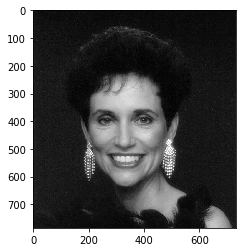

In [13]:
plt.imshow(woman, cmap="gray")
woman.shape

In [45]:
noisy_woman = random_noise(woman, var=0.01)

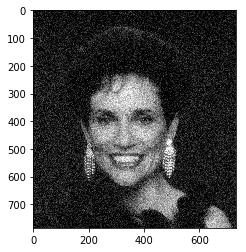

(785, 732)

In [46]:
import matplotlib.pyplot as plt
plt.imshow(noisy_woman, cmap="gray")
plt.show()
noisy_woman.shape

(785, 732)

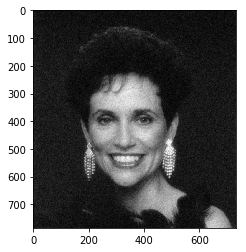

In [47]:
filter_noisy_woman = gaussian(noisy_woman, sigma=1.0)
plt.imshow(filter_noisy_woman, cmap="gray")
filter_noisy_woman.shape

## 2. Sobel Filter

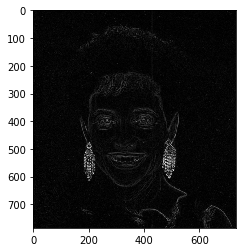

In [48]:
sobeled_woman = sobel(woman)
plt.imshow(sobeled_woman, cmap="gray")

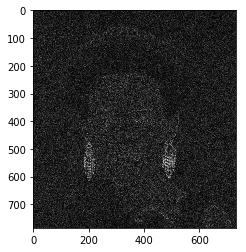

In [49]:
sobeled_noisy_woman = sobel(noisy_woman)
plt.imshow(sobeled_noisy_woman, cmap="gray")

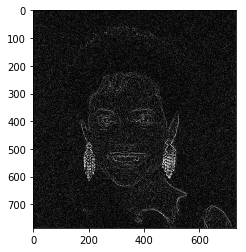

In [50]:
sobeled_filter_noisy_woman = sobel(filter_noisy_woman)
plt.imshow(sobeled_filter_noisy_woman, cmap="gray")

(array([2.42071e+05, 2.54260e+05, 6.59340e+04, 9.23900e+03, 1.83100e+03,
        7.50000e+02, 3.48000e+02, 1.44000e+02, 3.40000e+01, 9.00000e+00]),
 array([0.        , 0.05513907, 0.11027814, 0.16541721, 0.22055628,
        0.27569535, 0.33083442, 0.38597349, 0.44111256, 0.49625163,
        0.5513907 ]),
 <a list of 10 Patch objects>)

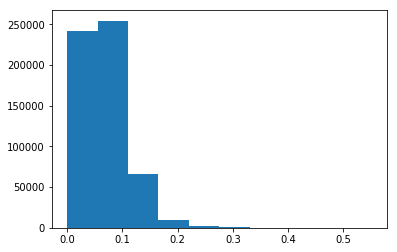

In [51]:
plt.hist(sobeled_noisy_woman.reshape(-1))

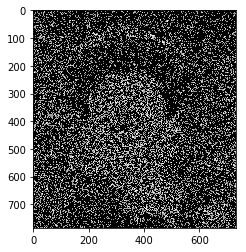

In [69]:
threshed_sobeled_noisy_woman = sobeled_noisy_woman.copy()
threshed_sobeled_noisy_woman[sobeled_noisy_woman < 0.08] = 0
threshed_sobeled_noisy_woman[sobeled_noisy_woman > 0.15] = 0
plt.imshow(threshed_sobeled_noisy_woman, cmap="gray")

(array([4.18124e+05, 1.33660e+05, 1.44150e+04, 4.20800e+03, 2.03500e+03,
        1.08100e+03, 6.84000e+02, 2.95000e+02, 9.60000e+01, 2.20000e+01]),
 array([0.        , 0.03064922, 0.06129844, 0.09194766, 0.12259688,
        0.1532461 , 0.18389532, 0.21454454, 0.24519376, 0.27584298,
        0.3064922 ]),
 <a list of 10 Patch objects>)

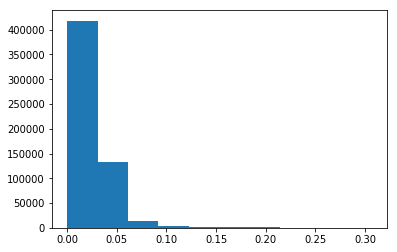

In [53]:
plt.hist(sobeled_filter_noisy_woman.reshape(-1))

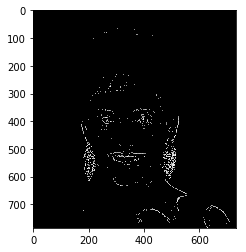

In [68]:
threshed_filter_sobeled_noisy_woman = sobeled_filter_noisy_woman.copy()
threshed_filter_sobeled_noisy_woman[sobeled_filter_noisy_woman < 0.08] = 0
threshed_filter_sobeled_noisy_woman[sobeled_filter_noisy_woman > 0.15] = 0
plt.imshow(threshed_filter_sobeled_noisy_woman, cmap="gray")

Edge detection is improved because gaussian noise will introduce a lot of high frequency noise, which has very large local gradients.

## 3. Laplacian operator

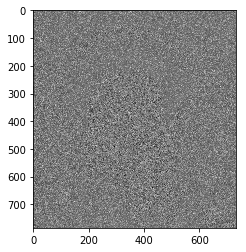

In [71]:
laplace_noisy_woman = laplace(noisy_woman)
plt.imshow(laplace_noisy_woman, cmap="gray")

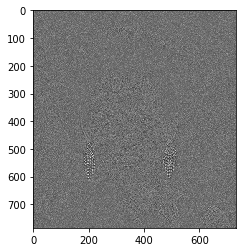

In [72]:
laplace_filter_noisy_woman = laplace(filter_noisy_woman)
plt.imshow(laplace_filter_noisy_woman, cmap="gray")

In [97]:
import numpy as np
def zero_crossings(img, thresh):
    output_img = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            v = img[i, j]
            N = []
            for k in range(-1, 2):
                for l in range(-1, 2):
                    neighbor = img[i + k, j + l]
                    if np.sign(neighbor) != np.sign(v):
                        N.append(neighbor)
            if N != []:
                m = min(np.abs(N))
                if abs(v) < m:
                    d = max(np.abs(v - np.array(N)))
                    if d > thresh:
                        output_img[i, j] = 1
    return output_img

In [98]:
zero_crossings_woman = zero_crossings(laplace_noisy_woman, 0.1)

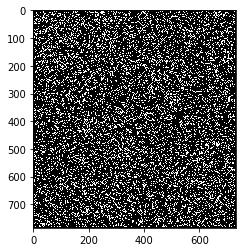

In [99]:
plt.imshow(zero_crossings_woman, cmap="gray")

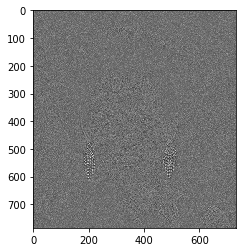

In [100]:
plt.imshow(laplace_filter_noisy_woman, cmap="gray")

In [101]:
zero_crossings_filter_woman = zero_crossings(laplace_filter_noisy_woman, 0.05)

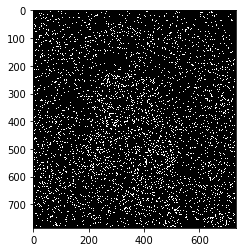

In [102]:
plt.imshow(zero_crossings_filter_woman, cmap="gray")